<a href="https://colab.research.google.com/github/mohd-faizy/07P_Exploratory_Data_Analysis_With_Seaborn/blob/master/02_Tumor_Diagnosis_KNNs_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Tumor Diagnosis: Part-2 Machine Learning & Data Preprocessing Using KNN Algorithm__

## __Task 1: Loading Libraries and Data__

In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_data.csv to breast_cancer_data.csv


In [2]:
import matplotlib.pyplot as plt     # For general visualizations
import seaborn as sns               # Much better visualizations
import numpy as np                  # For mathematical operations
import pandas as pd                 # For working with .csv file
import time                         # Python time library

#keep every visualization inside the browser window
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('/content/breast_cancer_data.csv')

## __Task 2: Data Preprocessing &  Normalization__

In [4]:
# importing data again as it will keep preprocessing stage clean --> start
dataset = pd.read_csv('/content/breast_cancer_data.csv')

# Setting diagnosis column as our target varible
y_target = dataset.diagnosis

# Counting the 'B' & 'M'
y_target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
# Changing the target values from string to binary numbers

'''
when the target values == 'M' --True --  its change target value to binary 0
& when the target value is false i.e. 'B' it changes it to binary 1
'''
y_target = np.where(y_target.values == 'M', 0, 1)

> __Mapping the values in the pandas datafram__

```
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 0,'B': 1})
```



In [6]:
dataset.head(-10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.02153,0.038980,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,0.2199,2.2390,1.437,14.46,0.012050,0.02736,0.048040,0.017210,0.01843,0.004938,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.0900,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,0.5375,2.9270,3.618,29.11,0.011590,0.01124,0.000000,0.000000,0.03004,0.003324,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969,NaN


> `id, diagnosis and unnamed: 32` are not necessary for training the data. So let's drop these column. 

$'diagnosis'$ is a target varible.

In [7]:
list = ['Unnamed: 32', 'id', 'diagnosis']
data = dataset.drop(list,axis = 1)
data.shape

(569, 30)

In [8]:
data.head(-10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.02153,0.038980,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,0.2199,2.2390,1.437,14.46,0.012050,0.02736,0.048040,0.017210,0.01843,0.004938,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.0900,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,0.5375,2.9270,3.618,29.11,0.011590,0.01124,0.000000,0.000000,0.03004,0.003324,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969


In [9]:
from sklearn.preprocessing import MinMaxScaler

[__Difference between Standard scaler and MinMaxScaler?__](https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler)



__Minmax scaler formula__

> MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] 

$X_{new} = \frac{X_i - min(X)}{max(X) - min(X)}$

In [10]:
scaler = MinMaxScaler()  # Data normalization

In [11]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> $Not-Normalized$

In [12]:
# fit is to train any model in sklearn library
# and transform is to scale the data
data = scaler.fit_transform(data) 
data

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

> __Normalized__: as the gap between data is much smaller now

## __Task 3: Spliting the data into test and traning dataset__

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y_target, test_size = 0.1)
# X is features, target is y
# test_set = 10% of our data set size

In [15]:
print(data.shape)
print(X_test.shape)
print(X_train.shape)

(569, 30)
(57, 30)
(512, 30)


## __Task 4: K-Nearest Neighbors Algorithm(KNNs)__

> - [__Introduction to k-Nearest Neighbors --> analyticsvidhya.com__](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)
- [__KNN Algorithm - Finding Nearest Neighbors --> tutorialspoint.com__](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm) 

### __KNN__
- __Supervised ML algorithm__
- Can be used for both __Classification__ as well as __Regression__.

> __K-nearest neighbors (KNN)__ algorithm uses _‘feature similarity’_ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

$Steps:$

- $Step-1$: Load the training as well as test data.
- $Step-2$: Choose the value of $K$ i.e. the nearest data points. $K$ can be any integer.
- $Step-3$:  For each point in the test data do the following:
    - Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is __Euclidean__.
    - Now, based on the distance value, sort them in __Ascending order__.
    - Next, it will choose the top $K$ rows from the sorted array.
    - Now, it will assign a class to the test point based on most frequent class of these rows.


__Eucledian distance__
![__Eucledian distance__](https://upload.wikimedia.org/wikipedia/commons/1/10/Euclidean_distance_3d_2_cropped.png)

__Example__

Suppose we have a dataset which can be plotted as follows −
![KNN1](https://www.tutorialspoint.com/machine_learning_with_python/images/concept_of_k.jpg)

Now, we need to classify new data point with black dot (at point 60,60) into blue or red class. We are assuming K = 3 i.e. it would find three nearest data points. It is shown in the next diagram −

![KNN-2](https://www.tutorialspoint.com/machine_learning_with_python/images/knn_algorithm.jpg)

We can see in the above diagram the three nearest neighbors of the data point with black dot. Among those three, two of them lies in Red class hence the black dot will also be assigned in red class.

In [16]:
# importing the KNN from the Sklearn library
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

### __Grid Search & hyperparameter__

This technique is used to find the _Optimal parameters_ to use with an algorithm. This is NOT the weights or the model, those are learned using the data.

__Hyper-parameters__ are like the $k$ in __k-Nearest Neighbors (KNNs)__. $KNNs$ requires the user to select which neighbor to consider when calculating the distance. The algorithm then tunes a parameter, a threshold, to see if a novel example falls within the learned distribution, this is done with the data.

> __This method will be able to best determine which k is the optimal to use for your data.__

__How does it work?__

First we build a grid. This is essentially a set of possible values that hyper-parameter can take. For our case we can use `[3, 5, 7, 11, 15]`. Then you will train your $KNN$ model for _each value_ in the grid. 

First we would do 3-NN, then 5-NN, and so on. For each iteration we will get a performance score which will tell you how well your algorithm performed using that value for the hyper-parameter. After we have gone through the entire grid we will select the value that gave the best performance.





[Nearest Neighbor Algorithms¶](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/neighbors.html)

In [18]:
from sklearn.model_selection import GridSearchCV

# Creating parameter grid
param_grid = {'n_neighbors': [5, 7, 11, 15],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 30, 50, 100]}

grid_search = GridSearchCV(knn, param_grid = param_grid)

$Syntax$

```
KNeighborsClassifier(n_neighbors=5,
                     weights=’uniform’,
                     algorithm=’auto’,
                     leaf_size=30,
                     metric=’minkowski’,
                     p=2,
                     metric_params=None)
```



- `n_neighbors` are the number of neighbors that will vote for the class of the target point; default number is 5. An odd number is preferred to avoid any tie.


- `weights` parameter has two choices: `uniform` and `distance`. For the `uniform` weight, each of the __k-neighbors__ has equal vote whatever its distance from the target point. If the weight is ‘distance‘ then voting weightage or importance varies by inverse of distance; those points who are nearest to the target point have greater influence than those who are farther away.

- Parameter `algorithm` is for selecting the indexing data structure that will be used for speeding up neighborhood search; value of `auto` leaves it to algorithm to make the best choice among the three.the three algorithms, `brute`, `kd_tree`and `ball_tree`.

> [__A working example of K-d tree formation and K-Nearest Neighbor algorithms__](https://ashokharnal.wordpress.com/2015/01/20/a-working-example-of-k-d-tree-formation-and-k-nearest-neighbor-algorithms/)

- `leaf_size`:  Parameter ‘leaf_size‘ is the size of leaf in `kd_tree` or `ball_tree`. __Larger the size, greater the speed of initial indexing structure formation__ but at the cost of __delay in classification of target point__.


- Parameter `metric` decides how distances are calculated in space. One familiar way is __euclidean distance__ but then in some cases other measures of distances such as __Manhattan distance__ are also used. A general formulation of distance metric is `minkowski` distance. When parameter $p$ is 2, it is the same as __Euclidean distance__ and when parameter $p$ is 1, it is __Manhattan distance__.

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 50, 100],
                         'n_neighbors': [5, 7, 11, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

> __Getting the best set of parameters from grid search__

In [20]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# Using the best set of parameter from the grid search
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
# fitting the knn parameters
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##  __Task 5: Model Evaluation__

![alt text](https://interviewbubble.com/wp-content/uploads/2019/03/1pOtBHai4jFd-ujaNXPilRg.png)

### __Accuracy__

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
predict = knn.predict(X_test)

In [25]:
print("Accuracy: {}%".format(accuracy_score(y_test,predict)*100))

Accuracy: 96.49122807017544%


### __Confusion matrix__

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
matrix= confusion_matrix(y_test, predict)

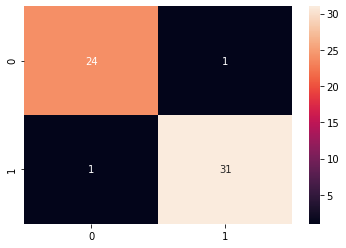

In [28]:
sns.heatmap(matrix,annot = True, fmt = "d")

### __Precision score__

In [29]:
from sklearn.metrics import precision_score

In [30]:
precision = precision_score(y_test, predict)

In [31]:
print("Precision: ", precision)

Precision:  0.96875


### __Recall__

In [32]:
from sklearn.metrics import recall_score

In [33]:
recall = recall_score(y_test, predict)

In [34]:
print("Recall: ", recall)

Recall:  0.96875
